<a href="https://colab.research.google.com/github/sbanerjee2020/vision2020/blob/master/Classify_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 22397, done.
remote: Total 22397 (delta 0), reused 0 (delta 0), pack-reused 22397
Receiving objects: 100% (22397/22397), 559.83 MiB | 34.48 MiB/s, done.
Resolving deltas: 100% (13266/13266), done.
Checking out files: 100% (2830/2830), done.


In [0]:
import os


In [0]:
!cd models/tutorials/image/imagenet

os.chdir("models/tutorials/image/imagenet")

In [11]:
!pwd

/content/models/tutorials/image/imagenet


In [12]:
!python classify_image.py

>> Downloading inception-2015-12-05.tgz 100.0%
Successfully downloaded inception-2015-12-05.tgz 88931400 bytes.
Instructions for updating:
Use tf.gfile.GFile.
2018-10-31 06:23:11.072140: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
giant panda, panda, panda bear, coon bear, Ailuropoda melanoleuca (score = 0.89107)
indri, indris, Indri indri, Indri brevicaudatus (score = 0.00779)
lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens (score = 0.00296)
custard apple (score = 0.00147)
earthstar (score = 0.00117)


In [0]:

URL = 'https://www.tensorflow.org/images/grace_hopper.jpg'

from PIL import Image
import requests
from io import BytesIO

response = requests.get(URL)
img = Image.open(BytesIO(response.content))

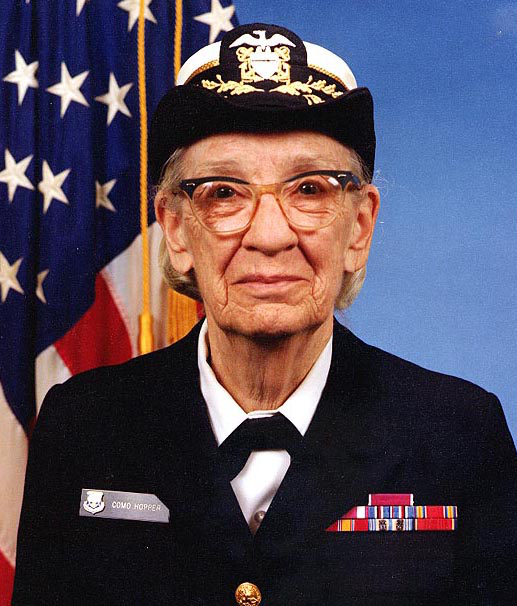

In [18]:
img

In [0]:
img.save('grace-hopper.png','png')

In [25]:
!ls -al

total 964
drwxr-xr-x 2 root root   4096 Oct 31 06:38 .
drwxr-xr-x 7 root root   4096 Oct 31 06:18 ..
-rw-r--r-- 1 root root    566 Oct 31 06:18 BUILD
-rw-r--r-- 1 root root   7744 Oct 31 06:18 classify_image.py
-rw-r--r-- 1 root root 481118 Oct 31 06:37 grace-hopper
-rw-r--r-- 1 root root 481118 Oct 31 06:38 grace-hopper.png


In [26]:
!python classify_image.py --image_file grace-hopper.png

Instructions for updating:
Use tf.gfile.GFile.
2018-10-31 06:38:36.569283: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
military uniform (score = 0.80801)
suit, suit of clothes (score = 0.02285)
academic gown, academic robe, judge's robe (score = 0.00954)
bearskin, busby, shako (score = 0.00941)
pickelhaube (score = 0.00774)


In [0]:

URL = 'https://www.bing.com/th?id=OIP.7VuEsBGAWWgJfMyZsAo6pAHaE7&w=295&h=196&c=7&o=5&dpr=2&pid=1.7'


response = requests.get(URL)
retinal_img = Image.open(BytesIO(response.content))

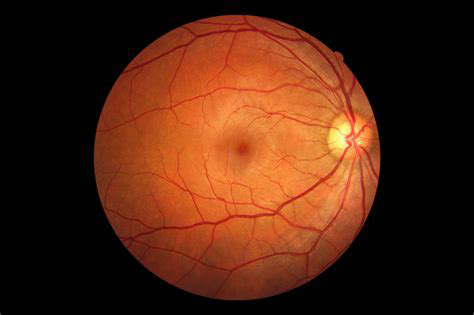

In [28]:
retinal_img

In [0]:
retinal_img.save('retinal.png','png')

In [30]:
!python classify_image.py --image_file retinal.png

Instructions for updating:
Use tf.gfile.GFile.
2018-10-31 06:43:06.864994: W tensorflow/core/framework/op_def_util.cc:355] Op BatchNormWithGlobalNormalization is deprecated. It will cease to work in GraphDef version 9. Use tf.nn.batch_normalization().
lampshade, lamp shade (score = 0.83002)
jack-o'-lantern (score = 0.02019)
spotlight, spot (score = 0.01676)
orange (score = 0.01451)
mask (score = 0.01026)


# TensorFlow for Poets

###  We will train a simple classifier to classify images of flowers.

https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/index.html#0


Usee transfer learning, which means we are starting with a model that has been already trained on another problem. We will then retrain it on a similar problem. Deep learning from scratch can take days, but transfer learning can be done in short order.

We are going to use a model trained on the ImageNet Large Visual Recognition Challenge dataset. These models can differentiate between 1,000 different classes, like Dalmatian or dishwasher. You will have a choice of model architectures, so you can determine the right tradeoff between speed, size and accuracy for your problem.

We will use this same model, but retrain it to tell apart a small number of classes based on our own examples.

What you'll Learn
How to use Python and TensorFlow to train an image classifier
How to classify images with your trained classifier
What you need
A basic understanding of Linux commands





In [1]:
!pip install --upgrade "tensorflow==1.7.*"

    100% |████████████████████████████████| 48.1MB 660kB/s 
    100% |████████████████████████████████| 3.1MB 9.7MB/s 
    100% |████████████████████████████████| 890kB 12.7MB/s 
  Running setup.py bdist_wheel for html5lib ... - \ done
  Stored in directory: /root/.cache/pip/wheels/50/ae/f9/d2b189788efcf61d1ee0e36045476735c838898eef1cad6e29
Successfully built html5lib
  Found existing installation: bleach 3.0.2
    Uninstalling bleach-3.0.2:
      Successfully uninstalled bleach-3.0.2
  Found existing installation: tensorboard 1.12.0
    Uninstalling tensorboard-1.12.0:
      Successfully uninstalled tensorboard-1.12.0
  Found existing installation: tensorflow 1.12.0rc2
    Uninstalling tensorflow-1.12.0rc2:
      Successfully uninstalled tensorflow-1.12.0rc2


In [2]:
!git clone https://github.com/googlecodelabs/tensorflow-for-poets-2

Cloning into 'tensorflow-for-poets-2'...
remote: Enumerating objects: 405, done.
remote: Total 405 (delta 0), reused 0 (delta 0), pack-reused 405
Receiving objects: 100% (405/405), 33.96 MiB | 36.08 MiB/s, done.
Resolving deltas: 100% (149/149), done.


In [0]:
!cd tensorflow-for-poets-2

#  Download the training images

Before you start any training, you'll need a set of images to teach the model about the new classes you want to recognize. We've created an archive of creative-commons licensed flower photos to use initially. Download the photos (218 MB) by invoking the following two commands:

In [8]:
!curl http://download.tensorflow.org/example_images/flower_photos.tgz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  218M  100  218M    0     0  66.8M      0  0:00:03  0:00:03 --:--:-- 66.8M


In [0]:
!mkdir tf_files
!mv flower_photos/  tf_files/



In [24]:
!ls tf_files/flower_photos

daisy  dandelion  LICENSE.txt  roses  sunflowers  tulips


In [26]:
# You can change the directory name
LOG_DIR = 'tb_logs'

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
  
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR))

get_ipython().system_raw('./ngrok http 6006 &')

!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2018-11-01 04:14:47--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.22.34.127, 52.22.236.254, 52.22.127.224, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.22.34.127|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5363700 (5.1M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.1’

ngrok-stable-linux- 100%[===================>]   5.11M  9.81MB/s    in 0.5s    

2018-11-01 04:14:48 (9.81 MB/s) - ‘ngrok-stable-linux-amd64.zip.1’ saved [5363700/5363700]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   
http://dfb4b287.ngrok.io


In [0]:
##IMAGE_SIZE=224
ARCHITECTURE="mobilenet_0.50_${IMAGE_SIZE}"

# mobilenet_0.50_224

In [0]:
import os
os.chdir("./tensorflow-for-poets-2")

In [33]:
!ls -al

total 52
drwxr-xr-x 7 root root  4096 Nov  1 03:55 .
drwxr-xr-x 1 root root  4096 Nov  1 04:15 ..
drwxr-xr-x 4 root root  4096 Nov  1 03:55 android
-rw-r--r-- 1 root root   969 Nov  1 03:55 CONTRIBUTING.md
drwxr-xr-x 8 root root  4096 Nov  1 03:55 .git
-rw-r--r-- 1 root root   100 Nov  1 03:55 .gitignore
drwxr-xr-x 3 root root  4096 Nov  1 03:55 ios
-rw-r--r-- 1 root root 11357 Nov  1 03:55 LICENSE
-rw-r--r-- 1 root root  1373 Nov  1 03:55 README.md
drwxr-xr-x 2 root root  4096 Nov  1 03:55 scripts
drwxr-xr-x 2 root root  4096 Nov  1 03:55 tf_files


In [34]:
!python -m scripts.retrain -h

usage: retrain.py [-h] [--image_dir IMAGE_DIR] [--output_graph OUTPUT_GRAPH]
                  [--intermediate_output_graphs_dir INTERMEDIATE_OUTPUT_GRAPHS_DIR]
                  [--intermediate_store_frequency INTERMEDIATE_STORE_FREQUENCY]
                  [--output_labels OUTPUT_LABELS]
                  [--summaries_dir SUMMARIES_DIR]
                  [--how_many_training_steps HOW_MANY_TRAINING_STEPS]
                  [--learning_rate LEARNING_RATE]
                  [--testing_percentage TESTING_PERCENTAGE]
                  [--validation_percentage VALIDATION_PERCENTAGE]
                  [--eval_step_interval EVAL_STEP_INTERVAL]
                  [--train_batch_size TRAIN_BATCH_SIZE]
                  [--test_batch_size TEST_BATCH_SIZE]
                  [--validation_batch_size VALIDATION_BATCH_SIZE]
                  [--print_misclassified_test_images] [--model_dir MODEL_DIR]
                  [--bottleneck_dir BOTTLENECK_DIR]
                  [--final_tensor_name FINAL_TE

In [38]:
!python -m scripts.retrain \
  --bottleneck_dir=tf_files/bottlenecks \
  --how_many_training_steps=500 \
  --model_dir=tf_files/models/ \
  --summaries_dir=tf_files/training_summaries/mobilenet_0.50_224 \
  --output_graph=tf_files/retrained_graph.pb \
  --output_labels=tf_files/retrained_labels.txt \
  --architecture=mobilenet_0.50_224 \
  --image_dir=../tf_files/flower_photos

INFO:tensorflow:Looking for images in 'daisy'
INFO:tensorflow:Looking for images in 'dandelion'
INFO:tensorflow:Looking for images in 'roses'
INFO:tensorflow:Looking for images in 'sunflowers'
INFO:tensorflow:Looking for images in 'tulips'
2018-11-01 04:21:01.940331: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/15813862117_dedcd1c56f_m.jpg_mobilenet_0.50_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/1396526833_fb867165be_n.jpg_mobilenet_0.50_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14350958832_29bdd3a254.jpg_mobilenet_0.50_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/5876455546_32049e5585.jpg_mobilenet_0.50_224.txt
INFO:tensorflow:Creating bottleneck at tf_files/bottlenecks/daisy/14307766919_fac3c37a6b_m.jpg_mobilenet_0.50_224.txt
IN

In [39]:
!python -m scripts.label_image -h

usage: label_image.py [-h] [--image IMAGE] [--graph GRAPH] [--labels LABELS]
                      [--input_height INPUT_HEIGHT]
                      [--input_width INPUT_WIDTH] [--input_mean INPUT_MEAN]
                      [--input_std INPUT_STD] [--input_layer INPUT_LAYER]
                      [--output_layer OUTPUT_LAYER]

optional arguments:
  -h, --help            show this help message and exit
  --image IMAGE         image to be processed
  --graph GRAPH         graph/model to be executed
  --labels LABELS       name of file containing labels
  --input_height INPUT_HEIGHT
                        input height
  --input_width INPUT_WIDTH
                        input width
  --input_mean INPUT_MEAN
                        input mean
  --input_std INPUT_STD
                        input std
  --input_layer INPUT_LAYER
                        name of input layer
  --output_layer OUTPUT_LAYER
                        name of output layer


In [0]:
img_daisy = Image.open("../tf_files/flower_photos/daisy/21652746_cc379e0eea_m.jpg")

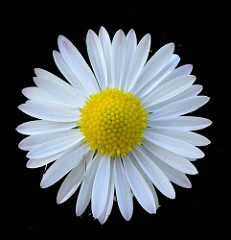

In [51]:
img_daisy

In [41]:
!python -m scripts.label_image \
    --graph=tf_files/retrained_graph.pb  \
    --image=../tf_files/flower_photos/daisy/21652746_cc379e0eea_m.jpg

2018-11-01 04:27:23.918945: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA

Evaluation time (1-image): 0.132s

daisy (score=0.97513)
sunflowers (score=0.01689)
dandelion (score=0.00795)
roses (score=0.00002)
tulips (score=0.00000)


In [0]:
img_rose = Image.open("../tf_files/flower_photos/roses/2414954629_3708a1a04d.jpg")

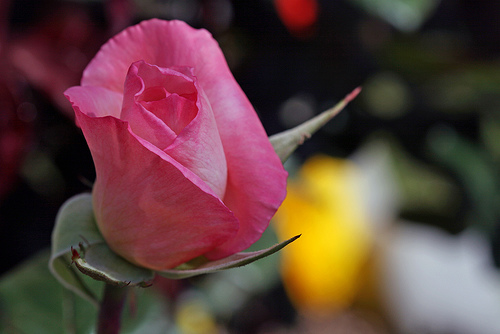

In [49]:
img_rose

In [42]:
!python -m scripts.label_image \
    --graph=tf_files/retrained_graph.pb  \
    --image=../tf_files/flower_photos/roses/2414954629_3708a1a04d.jpg

2018-11-01 04:28:27.017392: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA

Evaluation time (1-image): 0.129s

roses (score=0.72461)
tulips (score=0.27525)
dandelion (score=0.00011)
sunflowers (score=0.00003)
daisy (score=0.00001)


# Next Steps

###### https://medium.com/@javathunderman/how-to-get-started-with-the-diabetic-retinopathy-project-f1c2700188ae
###### https://stackoverflow.com/questions/41919912/keras-unsymmetrical-data-diabetic-retinopathy-detection

###### http://jeffreydf.github.io/diabetic-retinopathy-detection/